## NLP Techniques

### Tokenization

In [3]:
#Import NLTK Library
import nltk 
#Import Sentence, Word and Twitter Tokenizer
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk import TweetTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
sent_tokenize('''AI the is fast growing platform.  It mimic human brain.''')

['AI the is fast growing platform.', 'It mimic human brain.']

In [5]:
word_tokenize('I love Artifical Intelligence')


['I', 'love', 'Artifical', 'Intelligence']

In [6]:
twitter_tknzr= TweetTokenizer()
twitter_tknzr.tokenize("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. ;D")

['@switchfoot',
 'http://twitpic.com/2y1zl',
 '-',
 'Awww',
 ',',
 "that's",
 'a',
 'bummer',
 '.',
 ';D']

### Stemming

In [14]:
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


In [15]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [16]:
print("Stemming:" ,stemmer.stem('studying'))
print("Lemmatization:" ,lemmatizer.lemmatize('studying'))

Stemming: studi
Lemmatization: studying


In [17]:
print("Stemming:" ,stemmer.stem('densely'))
print("Lemmatization:" ,lemmatizer.lemmatize('densely'))

Stemming: dens
Lemmatization: densely


In [18]:
print("Stemming:" ,stemmer.stem('commonly'))
print("Lemmatization:" ,lemmatizer.lemmatize('commonly'))

Stemming: commonli
Lemmatization: commonly


### Stop Words

In [29]:
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords

In [30]:
stopwords=set(stopwords.words('english'))

In [31]:
text="She bought a shirt and a book."
tokens=word_tokenize(text)
tokens

['She', 'bought', 'a', 'shirt', 'and', 'a', 'book', '.']

In [32]:
text_without_stopwords=[w for w in tokens if not w  in stopwords]
text_without_stopwords

['She', 'bought', 'shirt', 'book', '.']

### Count Vectorizer

#### Import Necessary Libraries & Load the text



In [41]:
# Import Necessary Libraries from NLTK
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Defined Sample Corpus
text="I like this car. It has GPS navigation. It price also very cheap."
# Download & Define English Stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Text Pre-processing & Vocabulary collection



In [ ]:
.fit([["this","is"],["a","car"])

In [42]:
## Vocabulary collection without Count Vectorizer

# Define a list to store all vocabulary
L=[]
#Tokenization
tokens=word_tokenize(text)
#Remove Stop words
text_without_stopwords=[w for w in tokens if not w  in stopwords]
#Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
W=[lemmatizer.lemmatize(w.lower()) for w in text_without_stopwords if w!="."]
# Use "set" to get unique words and sort it in ascending order.
L=sorted(list(set(W)))
# print list
print(L)

['also', 'car', 'cheap', 'gps', 'i', 'it', 'like', 'navigation', 'price']


In [47]:
## Vocabulary collection with Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(text_without_stopwords)
vocabulary=vectorizer.get_feature_names()

In [48]:
vocabulary

['also', 'car', 'cheap', 'gps', 'it', 'like', 'navigation', 'price']

#### Vectorizer

In [49]:
## Without Count Vectorizer:
bag_of_words=[]
bag=[]
for x,doc in enumerate(text):
    bag=[]
    w_temp=[lemmatizer.lemmatize(w.lower()) for w in doc]
    for w in L:
        if w in w_temp:
            bag.append(1)
        else:
            bag.append(0)
    bag_of_words.append(bag)

In [50]:
## With Count Vectorizer

from nltk import sent_tokenize
vectorizer=CountVectorizer()
documents=sent_tokenize(text)
X=vectorizer.fit_transform(documents)

In [51]:
print(X.toarray())

[[0 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 1 1 0 1 0 0 0]
 [1 0 1 0 0 1 0 0 1 0 1]]


In [52]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

also  car  cheap  gps  has  it  like  navigation  price  this  very
0     0    1      0    0    0   0     1           0      0     1     0
1     0    0      0    1    1   1     0           1      0     0     0
2     1    0      1    0    0   1     0           0      1     0     1

### TF-IDF

In [53]:
#Defined the same text which is defined for Countvectorizer
text="I like this car. It has GPS navigation. It price also very cheap"
#Importing NLTK package and functions
import nltk
from nltk import sent_tokenize
#Extract documents from text(corpus)
sentences=sent_tokenize(text)
#Extracted documents
print(sentences)
['I like this car.', 'It has GPS navigation.', 'It price also very cheap']
#Importing Sklearn TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Define TF-IDF
tf_idf_vectorizer = TfidfVectorizer()
#Extract Vectors for sentences
X = tf_idf_vectorizer.fit_transform(sentences)
#import pandas to create dataframe for better understanding
import pandas as pd
pd.DataFrame(X.toarray(), columns = tf_idf_vectorizer.get_feature_names())

['I like this car.', 'It has GPS navigation.', 'It price also very cheap']


also      car     cheap       gps       has        it     like  \
0  0.000000  0.57735  0.000000  0.000000  0.000000  0.000000  0.57735   
1  0.000000  0.00000  0.000000  0.528635  0.528635  0.402040  0.00000   
2  0.467351  0.00000  0.467351  0.000000  0.000000  0.355432  0.00000   

   navigation     price     this      very  
0    0.000000  0.000000  0.57735  0.000000  
1    0.528635  0.000000  0.00000  0.000000  
2    0.000000  0.467351  0.00000  0.467351

### Word2Vec

#### Simple Word2Vec Model

In [55]:
#Define Tokens
tokens=[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time']]
# Import Wor2vec
from gensim.models.word2vec import Word2Vec
# By default min_count will be 5. Here we have small set of tokens so replaced count with 1.
model = Word2Vec(tokens,min_count=1)
#Save the model
model.save('word2vec')
#Load the model
model = Word2Vec.load('word2vec')

In [57]:
"computer" in model.wv

True

#### Word2Vec for Car Dataset

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [136]:
df = pd.read_csv('data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [137]:
df['Maker_Model']= df['Make']+ " " + df['Model']


In [138]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1) 
# Store them in the pandas dataframe
df_clean = pd.DataFrame({'clean': df2}) 
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2] 

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [140]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(sent, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)

INFO - 19:56:18: collecting all words and their counts
INFO - 19:56:18: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 19:56:18: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 19:56:18: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 19:56:18: Creating a fresh vocabulary
INFO - 19:56:18: Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 977 unique words (100.00% of original 977, drops 0)', 'datetime': '2023-01-05T19:56:18.952644', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
INFO - 19:56:18: Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 88129 word corpus (100.00% of original 88129, drops 0)', 'datetime': '2023-01-05T19:56:18.953927', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platfor

In [142]:
## We can obtain the word embedding directly from the training model
model.wv['Toyota Camry']

array([-0.01670389,  0.14337973, -0.00773398, -0.09245656, -0.03540464,
       -0.17377377,  0.02783708,  0.24162558, -0.16374269, -0.07042857,
       -0.04649878, -0.02339683,  0.04333936, -0.07659733, -0.09494171,
        0.12967016,  0.13172604,  0.2564768 , -0.15715553, -0.3252727 ,
       -0.02800341,  0.04075838,  0.27186757,  0.10334683,  0.08193858,
       -0.04930362, -0.01310117,  0.27603254, -0.05987671,  0.00606832,
        0.06997602, -0.02176858,  0.04935955, -0.08349259,  0.00649909,
       -0.11725829,  0.22841895,  0.00153093,  0.04948061,  0.08484159,
        0.07369769, -0.10142632, -0.18851498,  0.09933575,  0.35362938,
        0.10437388, -0.00375842, -0.11211941,  0.0498564 , -0.00848789],
      dtype=float32)

In [144]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.8209609

## Sentiment Analysis

In [60]:
import nltk, random
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


### Data Loading

In [61]:
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


In [63]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

In [64]:
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('Sample Text of Doc 1:')
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight


In [68]:
len(documents)

2000

### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(documents, test_size = 0.33, random_state=42)

In [71]:
## Sentiment Distrubtion for Train and Test
from collections import  Counter
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


In [72]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

### Text Vectorizer

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

In [74]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(1340, 6138)
(660, 6138)


In [75]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(X_train_bow, y_train)

LogisticRegression()

In [76]:
model_lg.predict(X_test_bow[:10].toarray())


array(['pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos'], dtype='<U3')

In [77]:
print(model_lg.score(X_test_bow, y_test))


0.7954545454545454


In [79]:
y_predict = model_lg.predict(X_test_bow)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [80]:
accuracy_score(y_predict,y_test)

0.7954545454545454

In [81]:
confusion_matrix(y_predict,y_test)

array([[255,  64],
       [ 71, 270]], dtype=int64)

In [83]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         neg       0.78      0.80      0.79       319
         pos       0.81      0.79      0.80       341

    accuracy                           0.80       660
   macro avg       0.80      0.80      0.80       660
weighted avg       0.80      0.80      0.80       660



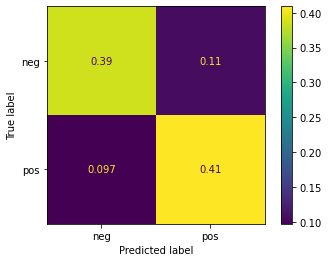

In [87]:
plot_confusion_matrix(model_lg, X_test_bow, y_test, normalize='all')


## WordCloud

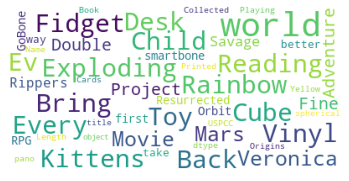

In [99]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = pd.read_csv("most_backed.csv")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

### Hotel Reviews

In [127]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [128]:
df = pd.read_csv("hotel_review.csv")
df['reviews.text']

0        Pleasant 10 min walk along the sea front to th...
1        Really lovely hotel. Stayed on the very top fl...
2        Ett mycket bra hotell. Det som drog ner betyge...
3        We stayed here for four nights in October. The...
4        We stayed here for four nights in October. The...
                               ...                        
35907    Best of the Best!!!! My family and I stayed in...
35908    Amazing Vacation in Beautiful Cabin We stayed ...
35909    My husband and I stayed at Tree Tops which is ...
35910    to share your opinion of this businesswith YP ...
35911           xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Name: reviews.text, Length: 35912, dtype: object

In [129]:
df["reviews.text"].dropna(inplace=True)

In [116]:
data = [data for data in df["reviews.text"] if type(data) ==str]

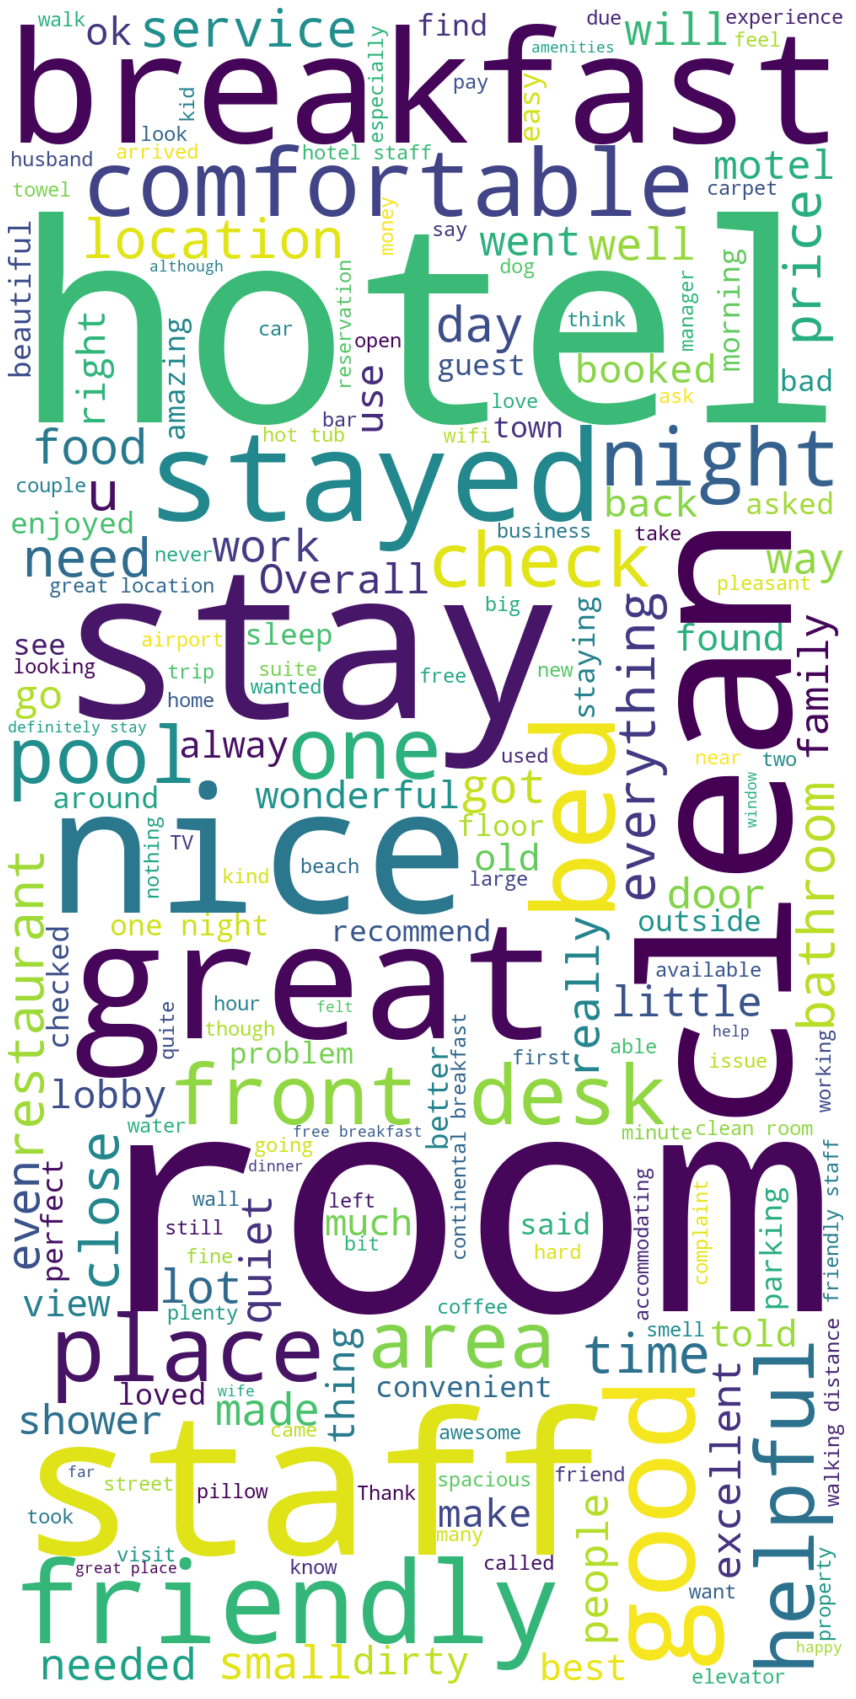

In [117]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
text = " ".join(review for review in data)
wordcloud = WordCloud(width = 1000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud.generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud based on word frequencies

In [119]:
from collections import Counter
from nltk.stem import WordNetLemmatizer
import re
words = text.lower().split()
words = [re.sub("[.,!?:;-='...'@#_]", " ", s) for s in words]
words = [re.sub(r'\d+', '', w) for w in words]
words = [word.strip() for word in words if word not in stopwords]
words.remove('')
lemmatiser = WordNetLemmatizer()
lem_words = [lemmatiser.lemmatize(w, pos='v') for w in words]
words_counter = Counter(lem_words)

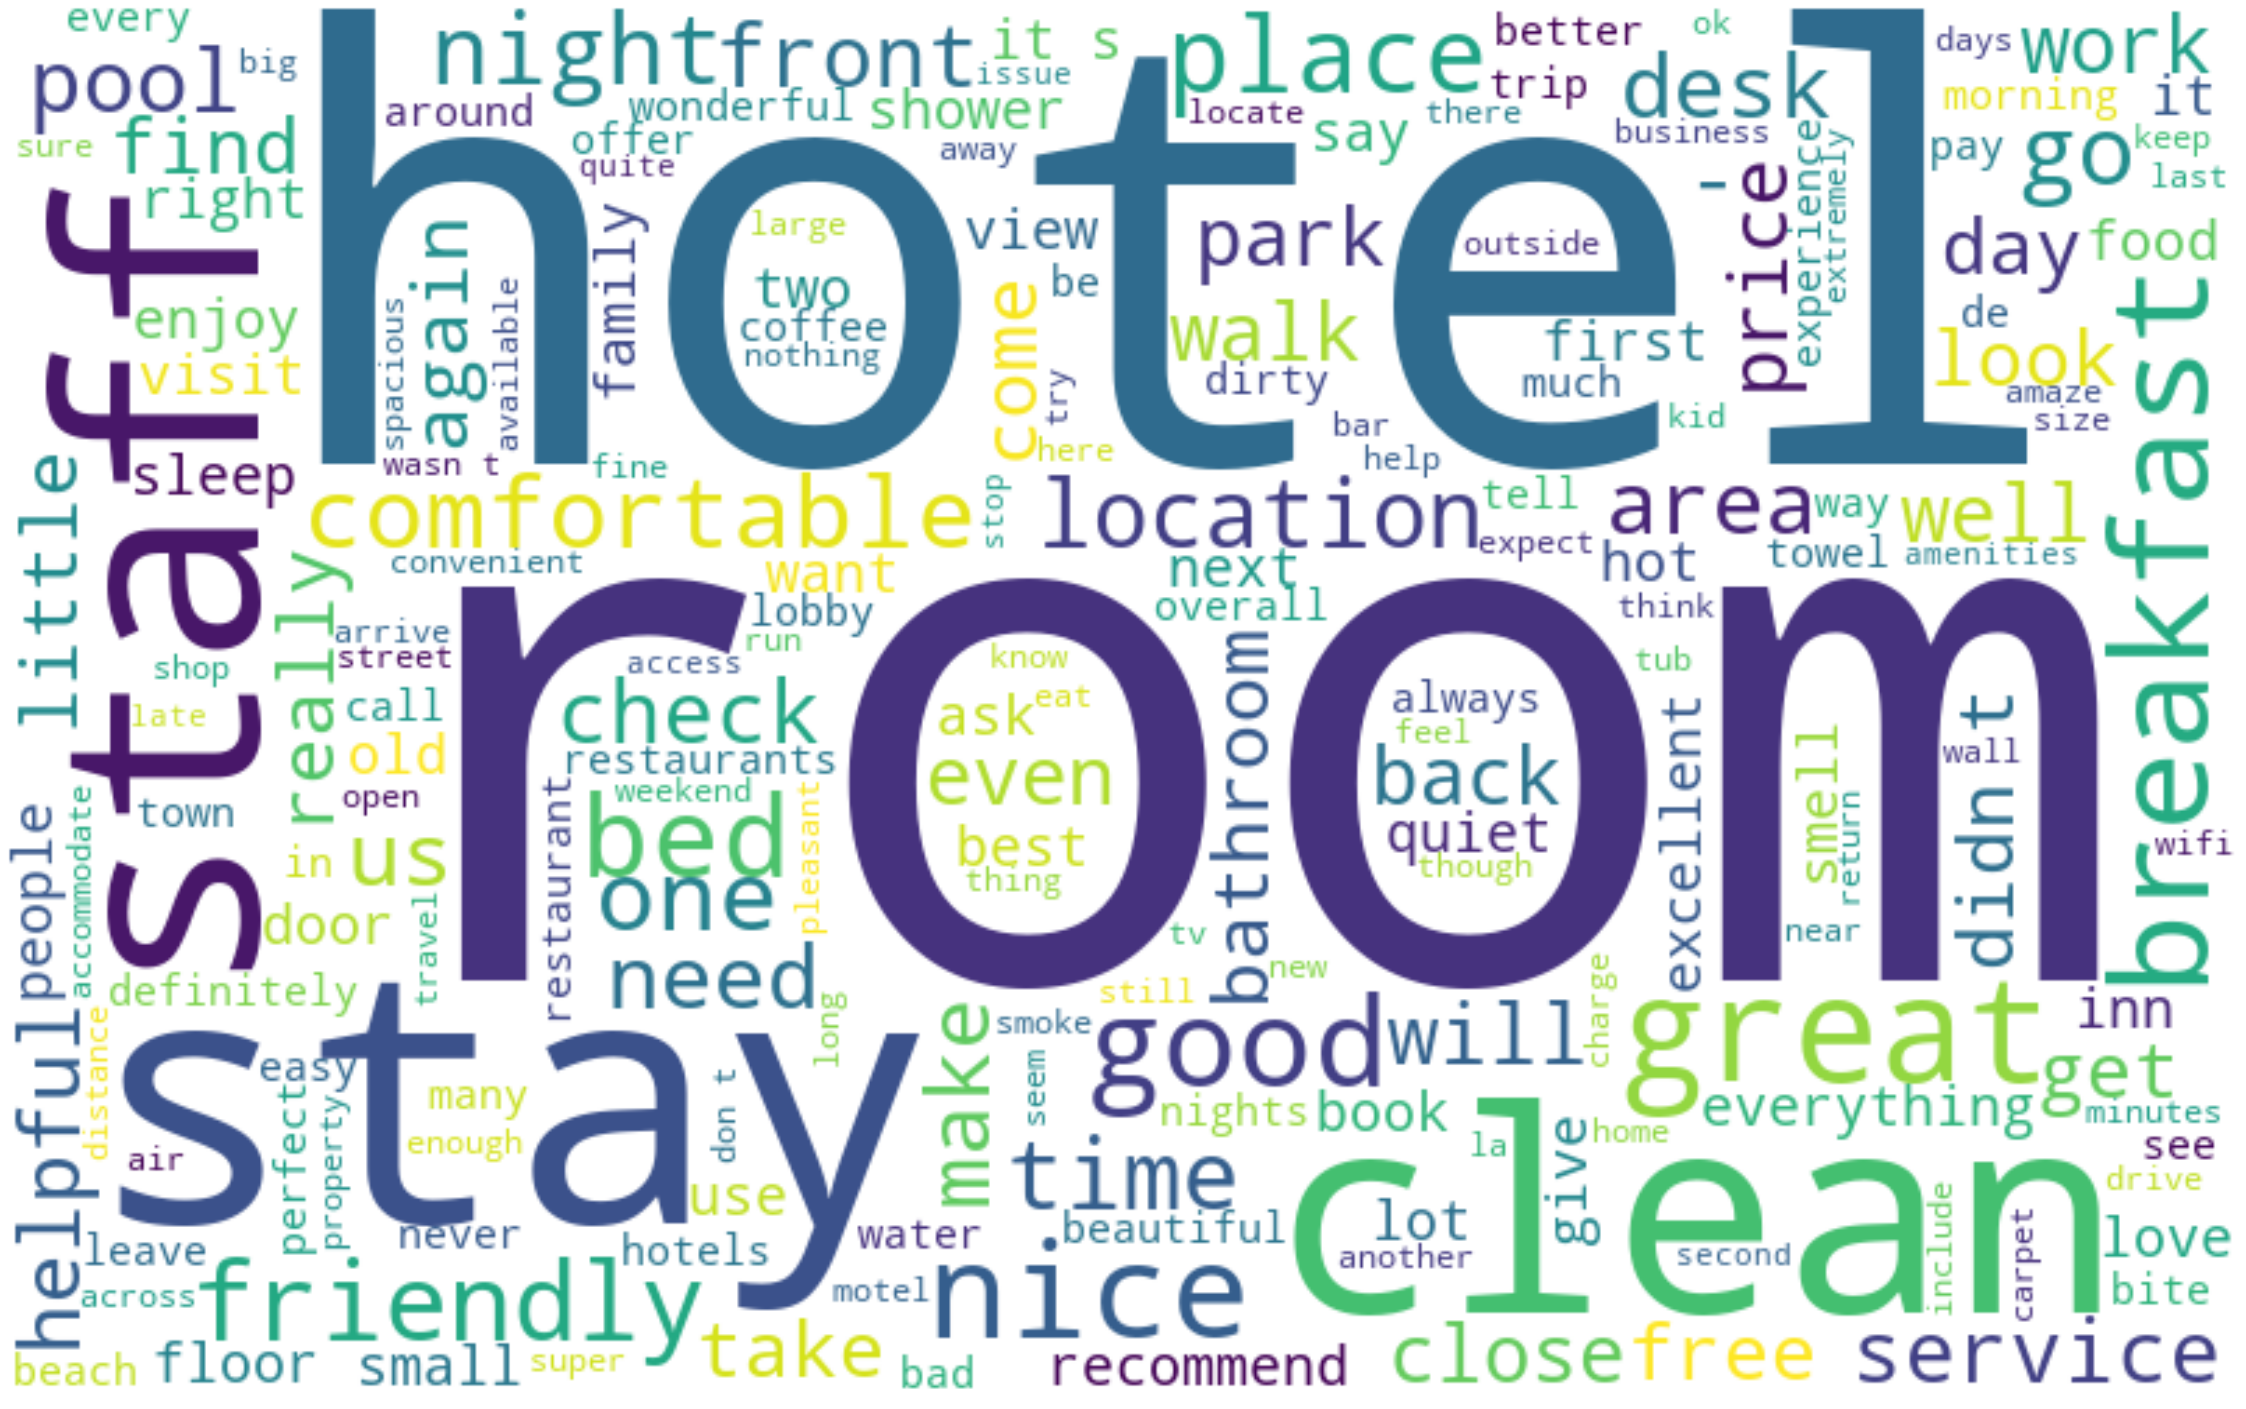

In [121]:
wordcloud = WordCloud(width = 800, height = 500,background_color='white')
wordcloud.generate_from_frequencies(words_counter)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud using TF-IDF

In [131]:
df.dropna(subset=["reviews.text"],inplace=True)

In [132]:
# df.dropna(inplace=True)
df["clean_text"] = df["reviews.text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))
df["clean_text"] = df["clean_text"].apply(lambda s: ' '.join(re.sub(r'\d+', '', s).split()))
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stopwords] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text
df["clean_text"] = df["clean_text"].apply(lambda s: rem_en(s))
lemmatiser = WordNetLemmatizer()
df["clean_text"] = df["clean_text"].apply(lambda row: [lemmatiser.lemmatize(r, pos='v') for r in row.split()])
df["clean_text"] = df["clean_text"].apply(lambda row: ' '.join(row))

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(df["clean_text"])
df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=vectorizer.get_feature_names())
df_tfidf_sklearn

aa  aaa  aaaahh  aadido  aafter  aamiainen  aamiaisen  aamiaista  \
0      0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
1      0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
2      0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
3      0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
4      0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
...    ...  ...     ...     ...     ...        ...        ...        ...   
35885  0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
35886  0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
35887  0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
35888  0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   
35889  0.0  0.0     0.0     0.0     0.0        0.0        0.0        0.0   

       aamuksi  aamulla  ...   먹는  숙박시설입니다  시설은  아울렛과의  아침식사  우드버리   정도  청결하고  \
0          0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
1          0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
2          0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
3          0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
4          0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
...        ...      ...  ...  ...      ...  ...    ...   ...   ...  ...   ...   
35885      0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
35886      0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
35887      0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
35888      0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   
35889      0.0      0.0  ...  0.0      0.0  0.0    0.0   0.0   0.0  0.0   0.0   

       편했습니다  화장실은  
0        0.0   0.0  
1        0.0   0.0  
2        0.0   0.0  
3        0.0   0.0  
4        0.0   0.0  
...      ...   ...  
35885    0.0   0.0  
35886    0.0   0.0  
35887    0.0   0.0  
35888    0.0   0.0  
35889    0.0   0.0  

[35890 rows x 28020 columns]

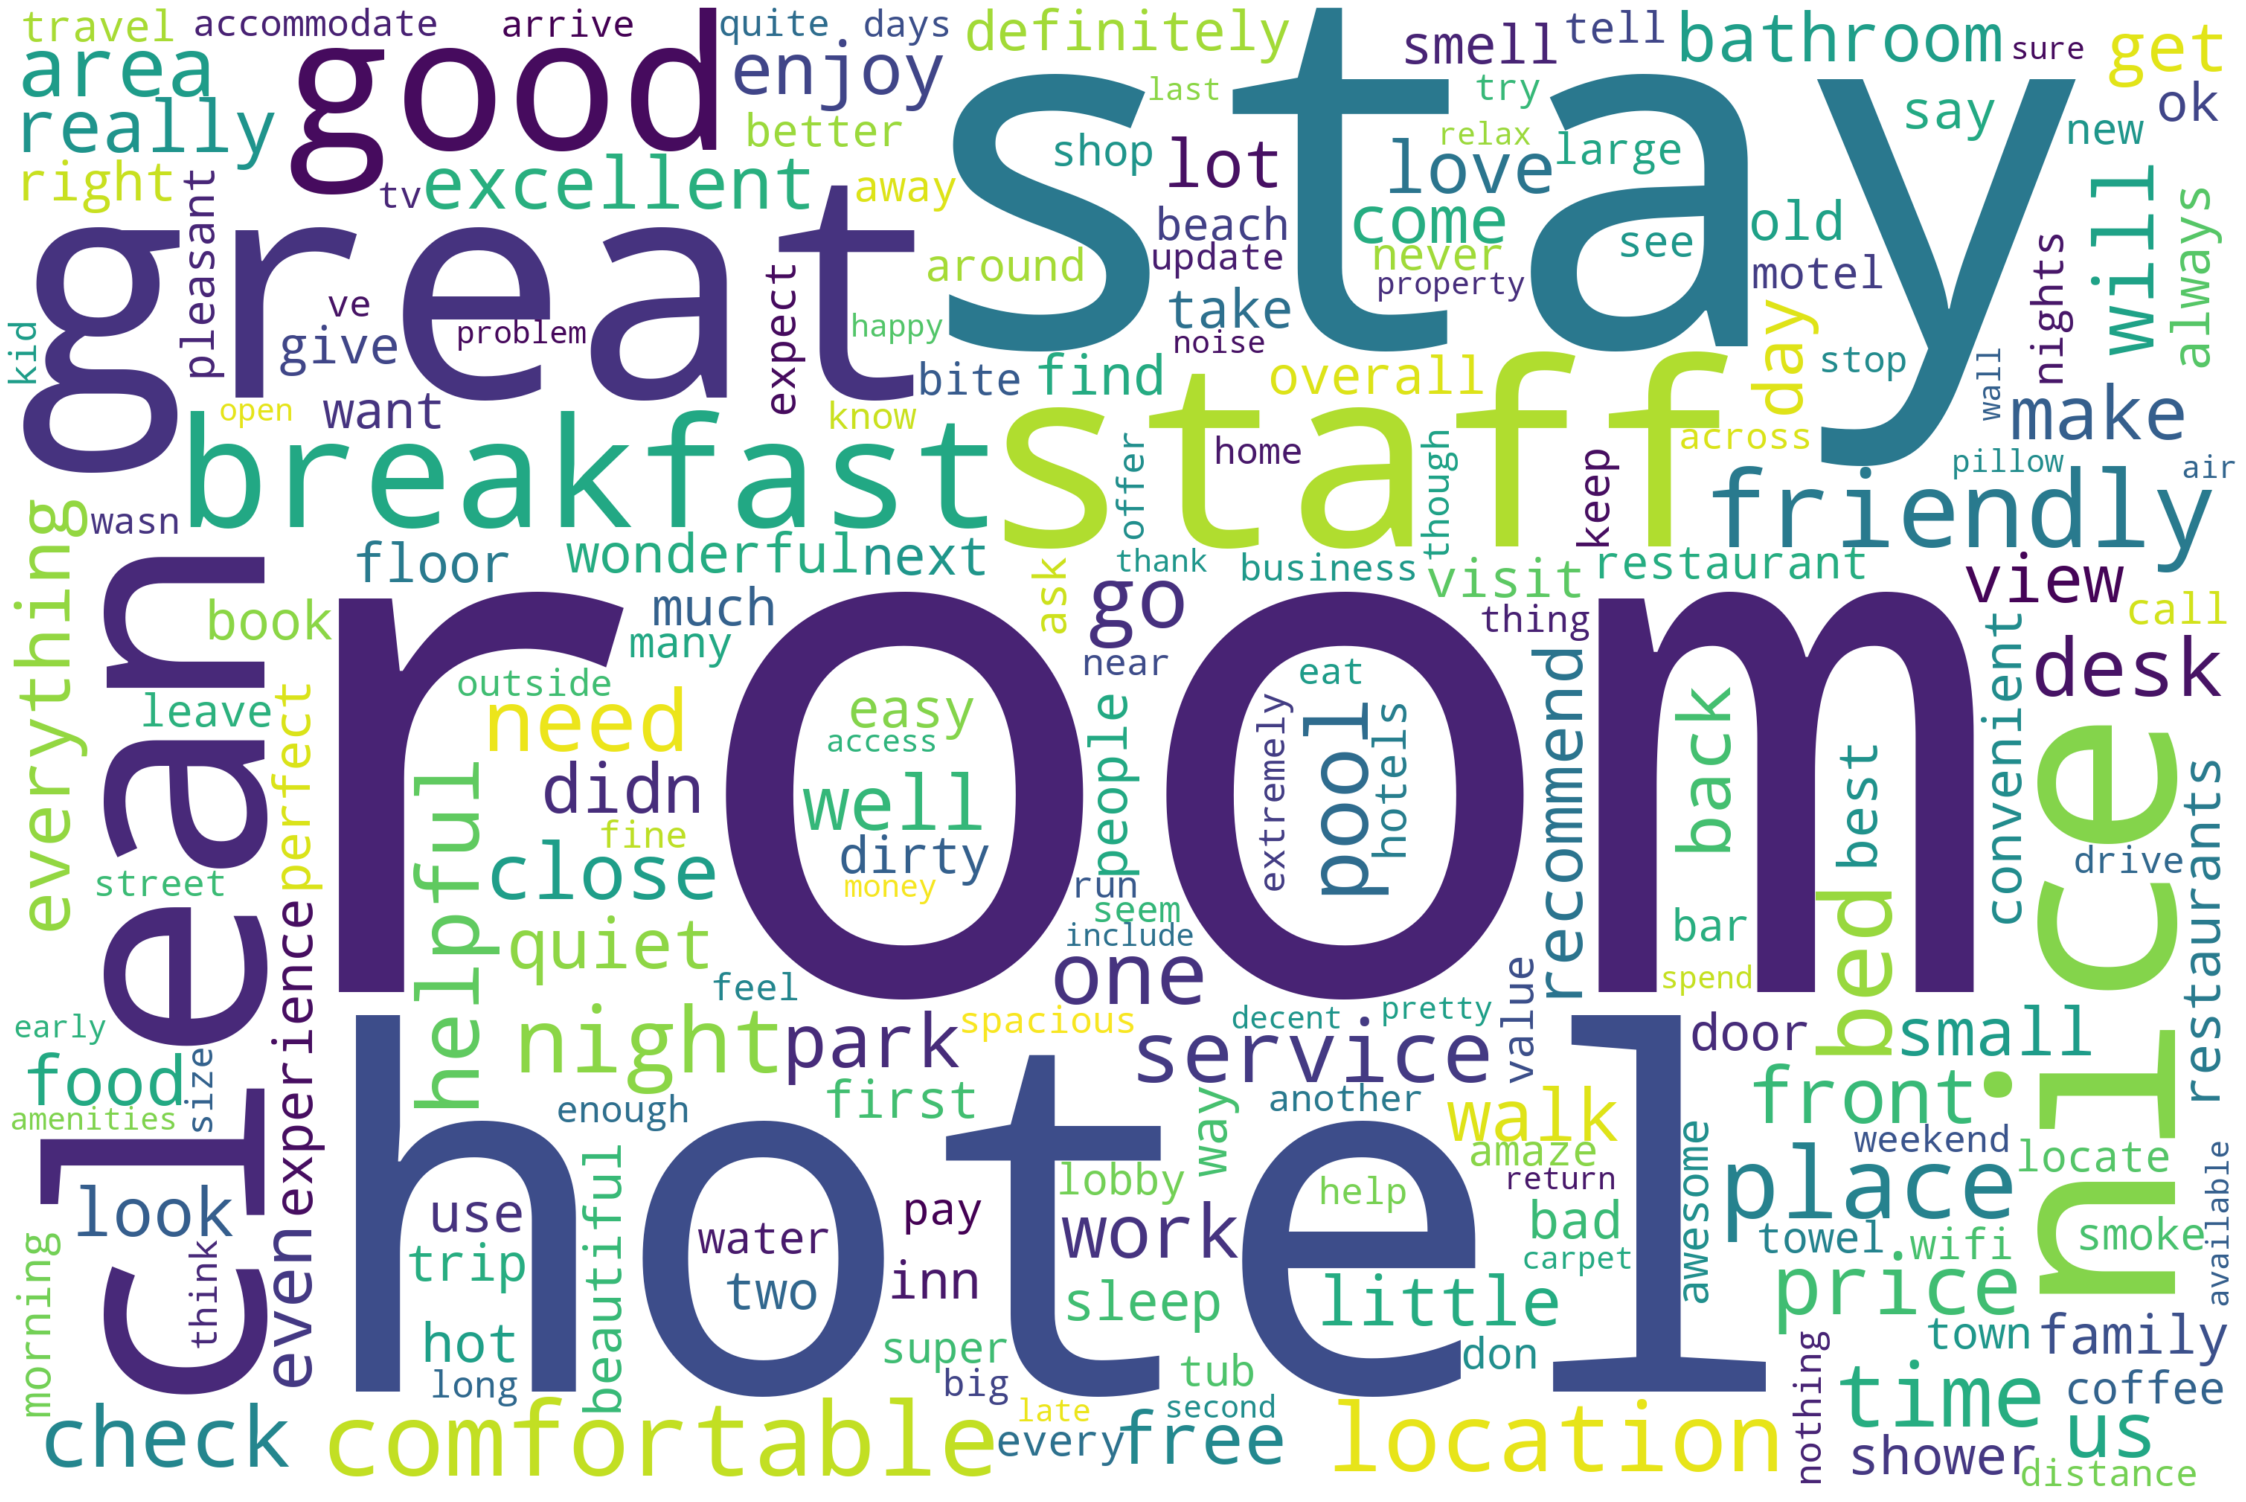

In [134]:
tf_idf_counter = df_tfidf_sklearn.T.sum(axis=1)
wordcloud = WordCloud(width = 800, height = 800,background_color='white')
wordcloud.generate_from_frequencies(tf_idf_counter)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()